In [1]:
#importing necessary liabraries
import numpy as np                 
import pandas as pd                
import matplotlib.pyplot as plt     
%matplotlib inline
import seaborn as sns 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import os

In [2]:
#importing dataset
os.chdir(r"C:\Users\Komal\Downloads\Womens Clothing E-Commerce Reviews.csv")
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


data preprocessing and visualization

In [3]:
data.shape

(23486, 11)

In [4]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
#Rating:  1 Worst, to 5 Best

In [6]:
#final data
data = data[['Review Text','Rating']]
data.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [7]:
data.isnull().sum()

Review Text    845
Rating           0
dtype: int64

In [8]:
data.dropna(inplace=True)

<ipython-input-8-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [9]:
data.value_counts(['Rating'])

Rating
5         12540
4          4908
3          2823
2          1549
1           821
dtype: int64

c:\users\komal\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

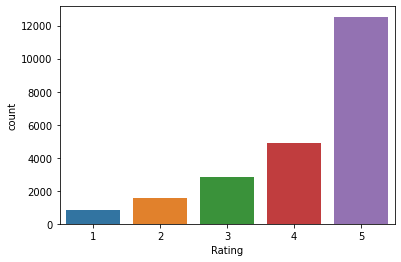

In [10]:
sns.countplot(data.Rating)

In [11]:
#removing punctuation
def punc_clean(text):
    import string as st
    a = [w for w in text if w not in st.punctuation]
    return ''.join(a)
data['Review Text'] = data['Review Text'].apply(punc_clean)
data.head()

<ipython-input-11-909a3d3a165c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review Text'] = data['Review Text'].apply(punc_clean)


,Review Text,Rating
0,Absolutely wonderful silky and sexy and comfo...,4
1,Love this dress its sooo pretty i happened t...,5
2,I had such high hopes for this dress and reall...,3
3,I love love love this jumpsuit its fun flirty ...,5
4,This shirt is very flattering to all due to th...,5


In [12]:
#removing stopwords
def remove_stopwards(text):
    stopword = nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    text = text.lower()
    a = [w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)

data['Review Text'] = data['Review Text'].apply(remove_stopwards)

<ipython-input-12-4bdeadae338d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review Text'] = data['Review Text'].apply(remove_stopwards)


In [13]:
data.head()

,Review Text,Rating
0,absolutely wonderful silky sexy comfortable,4
1,love dress sooo pretty happened find store im ...,5
2,high hopes dress really wanted work initially ...,3
3,love love love jumpsuit fun flirty fabulous ev...,5
4,shirt flattering due adjustable front tie perf...,5


In [14]:
#converting text to vector form 
vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(data['Review Text'])
vect_X = vectr.transform(data['Review Text'])

Building model and making prediction

In [15]:

model = LogisticRegression()
clf=model.fit(vect_X,data['Rating'])
clf.score(vect_X,data['Rating'])*100

c:\users\komal\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


84.08639194381874

In [16]:
clf.predict(vectr.transform(['love this dress its awsome']))

array([5], dtype=int64)

In [17]:
clf.predict(vectr.transform(['not good its worst']))

array([1], dtype=int64)